![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [44]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load Data (3 Marks)

In [46]:
path = "/content/drive/My Drive/Colab Notebooks/GL-AIML/Natural Language Processing/Projects/Project 2 - Sequential Models in NLP - Sarcasm Detection/Sarcasm_Headlines_Dataset.json"
data = pd.read_json(path, lines=True)

In [47]:
data.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [49]:
print("Checking null values: ")
data.isna().sum()

Checking null values: 


article_link    0
headline        0
is_sarcastic    0
dtype: int64

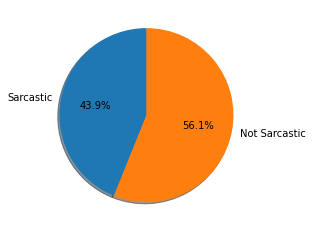

In [50]:
labels = ['Sarcastic', 'Not Sarcastic']
count_sarcastic = len(data[data['is_sarcastic']==1])
count_notsar = len(data[data['is_sarcastic']==0])
values = [count_sarcastic, count_notsar]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Drop `article_link` from dataset (3 Marks)

In [51]:
data.drop('article_link', axis=1, inplace=True)

In [52]:
data.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [53]:
length = [len(headline) for headline in data.headline ]

In [54]:
data['length'] = length

In [55]:
data.head(5)

,headline,is_sarcastic,length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [56]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [57]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(data)
head_lines[0:10]

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages']]

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [59]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [60]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(head_lines)
sequences = tokenizer.texts_to_sequences(head_lines)

In [61]:
word_index = tokenizer.word_index
print("unique tokens - ",len(word_index))

unique tokens -  27483


### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
lines_pad = pad_sequences(sequences, maxlen=maxlen)
sentiment =  data['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

validation_split=0.2
num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

In [63]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (21368, 25)
Shape of y_train: (21368,)
Shape of X_test_pad: (5341, 25)
Shape of y_test: (5341,)


### Vocab mapping
- There is no word for 0th index

In [64]:
tokenizer.word_index

{'new': 1,
 'trump': 2,
 'man': 3,
 'us': 4,
 'report': 5,
 'one': 6,
 'area': 7,
 'donald': 8,
 'says': 9,
 'woman': 10,
 'day': 11,
 'time': 12,
 'first': 13,
 'like': 14,
 'get': 15,
 'trumps': 16,
 'people': 17,
 'obama': 18,
 'house': 19,
 'life': 20,
 'make': 21,
 'still': 22,
 'women': 23,
 'white': 24,
 'could': 25,
 'back': 26,
 'clinton': 27,
 'would': 28,
 'world': 29,
 'years': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'black': 34,
 'gop': 35,
 'study': 36,
 'bill': 37,
 'best': 38,
 'police': 39,
 'watch': 40,
 'american': 41,
 'really': 42,
 'show': 43,
 'school': 44,
 'know': 45,
 'things': 46,
 'good': 47,
 'home': 48,
 'president': 49,
 'finds': 50,
 'death': 51,
 'year': 52,
 'say': 53,
 'video': 54,
 'nation': 55,
 'going': 56,
 'love': 57,
 'health': 58,
 'last': 59,
 'state': 60,
 'hillary': 61,
 'big': 62,
 'parents': 63,
 'may': 64,
 'every': 65,
 'mom': 66,
 'kids': 67,
 'campaign': 68,
 'need': 69,
 'gets': 70,
 'getting': 71,
 'party': 72,
 'little': 7

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [65]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

27484


### Load Glove Word Embeddings (3 Marks)

In [66]:
import os
path = "/content/drive/My Drive/Colab Notebooks/GL-AIML/Natural Language Processing/Projects/Project 2 - Sequential Models in NLP - Sarcasm Detection/"
os.chdir(path)

### Create embedding matrix

In [67]:
EMBEDDING_FILE = 'glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten, Bidirectional

model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.25)))
model.add(Dense(1, activation='sigmoid'))

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 200)           5496800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               135680    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 5,632,609
Trainable params: 135,809
Non-trainable params: 5,496,800
_________________________________________________________________
None


### Compile the model (3 Marks)

In [69]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

### Fit the model (4 Marks)

In [70]:
batch_size = 32
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/5
668/668 - 118s - loss: 5.2720e-08 - accuracy: 0.5124 - val_loss: 5.0755e-08 - val_accuracy: 0.5160
Epoch 2/5
668/668 - 119s - loss: 5.2720e-08 - accuracy: 0.5146 - val_loss: 5.0755e-08 - val_accuracy: 0.5160
Epoch 3/5
668/668 - 122s - loss: 5.2720e-08 - accuracy: 0.5149 - val_loss: 5.0755e-08 - val_accuracy: 0.5160
Epoch 4/5
668/668 - 124s - loss: 5.2720e-08 - accuracy: 0.5107 - val_loss: 5.0755e-08 - val_accuracy: 0.5160
Epoch 5/5
668/668 - 124s - loss: 5.2720e-08 - accuracy: 0.5145 - val_loss: 5.0755e-08 - val_accuracy: 0.5160


In [91]:
def predict_sarcasm(s):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=maxlen, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100

    if pred[0][0]>=50: 
        return "It's a sarcasm!" 
    else: 
        return "It's not a sarcasm."

In [92]:
predict_sarcasm("What a surprise.")

"It's not a sarcasm."

In [93]:
predict_sarcasm("Well, what a surprise.")

"It's a sarcasm!"